In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL
import pathlib
from pathlib import Path
import os
import cv2
print (tf.__version__)
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras.models import Sequential


2.9.0


In [22]:
directory = 'MathSymbols'
files = Path(directory).glob('*')
img_height = 45
img_width = 45
batch_size = 10

In [19]:
tf.keras.utils.image_dataset_from_directory(
    'MathSymbols',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(45, 45),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 375974 files belonging to 82 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 45, 45, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [115]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'MathSymbols',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(45, 45),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  'MathSymbols',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(45, 45),
  batch_size=batch_size)

Found 375974 files belonging to 82 classes.
Using 300780 files for training.
Found 375974 files belonging to 82 classes.
Using 75194 files for validation.


In [116]:
class_names = train_ds.class_names
print(class_names)

['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos', 'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']


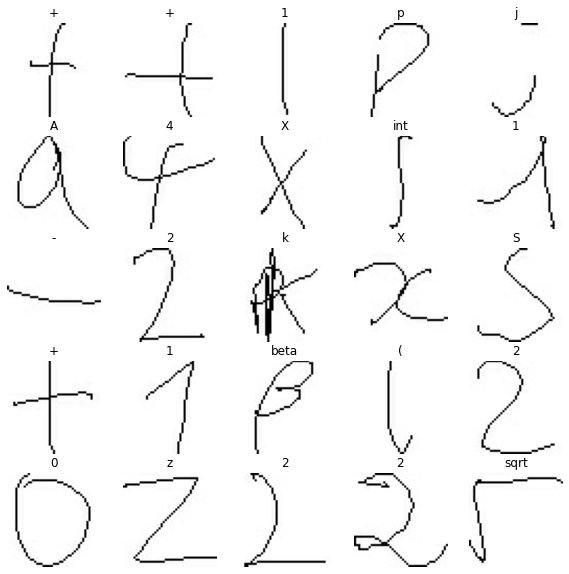

In [117]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [118]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [119]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.Rescaling(1./255)


In [120]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [121]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [122]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 45, 45, 3)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 45, 45, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 22, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)       

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
9400/9400 [==============================] - 327s 35ms/step - loss: 0.3572 - accuracy: 0.9020 - val_loss: 0.1868 - val_accuracy: 0.9452
Epoch 2/50
9400/9400 [==============================] - 244s 26ms/step - loss: 0.1420 - accuracy: 0.9562 - val_loss: 0.1281 - val_accuracy: 0.9605
Epoch 3/50
9400/9400 [==============================] - 242s 26ms/step - loss: 0.0986 - accuracy: 0.9686 - val_loss: 0.0924 - val_accuracy: 0.9701
Epoch 4/50
7805/9400 [=======================>......] - ETA: 42s - loss: 0.0781 - accuracy: 0.9745

In [106]:
history.history

{'loss': [0.3862953782081604],
 'accuracy': [0.8942615985870361],
 'val_loss': [0.19016830623149872],
 'val_accuracy': [0.943865180015564]}

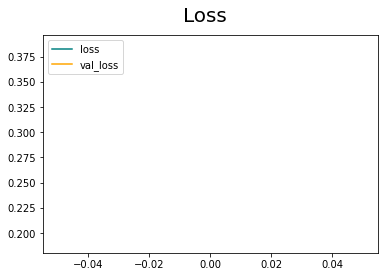

In [107]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

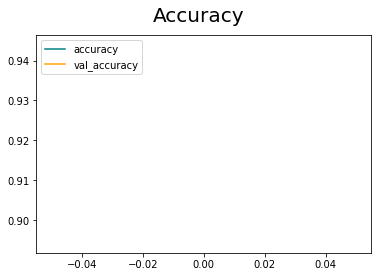

In [108]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [109]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

In [72]:
width = 45  # canvas width
height = 45 # canvas height
center = width/2
white = (255, 255, 255) # canvas back

def save():
    # save image to hard drive
    filename = "user_input.png"
    output_image.save(filename)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=2)
    draw.line([x1, y1, x2, y2],fill="black",width=2)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()

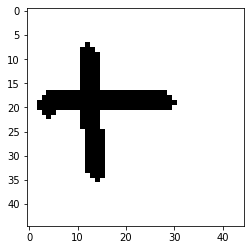

(45, 45, 3)


In [110]:
from PIL import Image
from numpy import asarray
import cv2
image =cv2.imread('user_input.png')
plt.imshow(image)
plt.show()
print (image.shape)


In [114]:
img = tf.keras.utils.load_img('user_input.png',color_mode = "grayscale")
img
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
model.predict(img_array)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/conv2d_6/Relu' defined at (most recent call last):
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 972, in launch_instance
      app.start()
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\aaron\AppData\Local\Temp\ipykernel_16844\3105620335.py", line 5, in <cell line: 5>
      model.predict(img_array)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
      return self(x, training=False)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\layers\convolutional\base_conv.py", line 278, in call
      return self.activation(outputs)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\activations.py", line 311, in relu
      return backend.relu(x, alpha=alpha, max_value=max_value, threshold=threshold)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 4992, in relu
      x = tf.nn.relu(x)
Node: 'sequential_2/conv2d_6/Relu'
input depth must be evenly divisible by filter depth: 1 vs 3
	 [[{{node sequential_2/conv2d_6/Relu}}]] [Op:__inference_predict_function_97795]

In [112]:
predictions_array = model.predict(np.expand_dims(image/255, 0))
print (predictions_array)

1/1 [==============================] - 0s 77ms/step
[[-1.74279079e+01 -1.07106447e+01 -1.63100414e+01 -4.42839289e+00
  -8.15655613e+00 -5.80328131e+00 -1.98138392e+00 -7.73647308e+00
  -2.36928368e+00 -9.08413982e+00 -2.58174586e+00 -1.41530871e+00
  -3.22236323e+00 -4.25333357e+00  1.39567629e-01 -5.73723602e+00
  -1.23683710e+01  2.67420244e+00 -7.72528315e+00 -2.02265358e+00
   2.22239375e+00  1.22820936e-01  1.58553100e+00 -3.83617401e-01
  -1.90527499e-01 -4.48150921e+00 -2.64685678e+00 -2.54565501e+00
  -6.26458931e+00 -1.43244381e+01 -5.13829136e+00 -1.26755571e+01
   4.20395041e+00 -7.84511387e-01 -1.50522220e+00 -1.18413365e+00
  -1.04686232e+01 -2.37626600e+00 -9.46695900e+00 -2.04508162e+00
  -2.44308233e+00 -8.02096558e+00 -3.57791710e+00 -4.64703655e+00
  -1.04487257e+01 -3.11686897e+00 -8.06030941e+00  1.07102835e+00
  -1.43804045e+01 -5.28561974e+00  1.65860784e+00 -2.78752732e+00
  -7.07458496e+00 -1.40331459e+01 -9.82696438e+00  1.87427282e+00
   3.52424169e+00 -1.000

In [113]:
score = tf.nn.softmax(predictions_array[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to b with a 37.40 percent confidence.
